In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Problem 1

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## Data Dictionary for Market Segmentation:

#### spending: Amount spent by the customer per month (in 1000s)
#### advance_payments: Amount paid by the customer in advance by cash (in 100s)
#### probability_of_full_payment: Probability of payment done in full by the customer to the bank
#### current_balance: Balance amount left in the account to make purchases (in 1000s)
#### credit_limit: Limit of the amount in credit card (10000s)
#### min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
#### max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [2]:
bank = pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
bank.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank.shape

(210, 7)

In [6]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [8]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(bank[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(bank[column], kde=False, color='red');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=bank[column])
    plt.show()

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


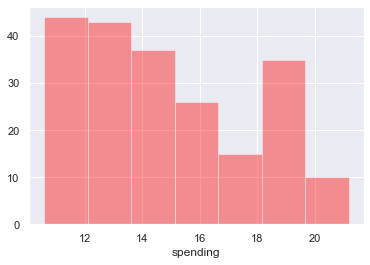

BoxPlot of spending
----------------------------------------------------------------------------


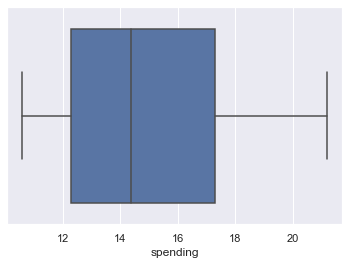

In [9]:
univariateAnalysis_numeric('spending',2)

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


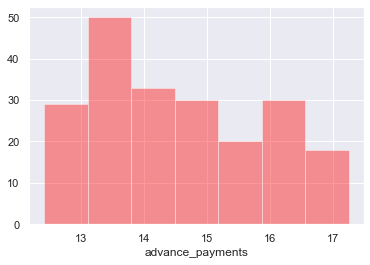

BoxPlot of advance_payments
----------------------------------------------------------------------------


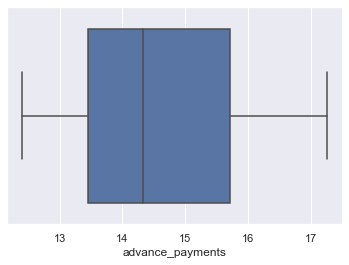

In [10]:
univariateAnalysis_numeric('advance_payments',2)

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


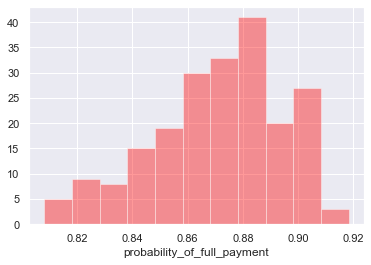

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


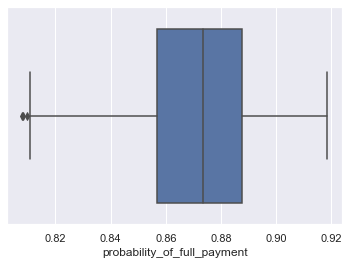

In [11]:
univariateAnalysis_numeric('probability_of_full_payment',2)

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


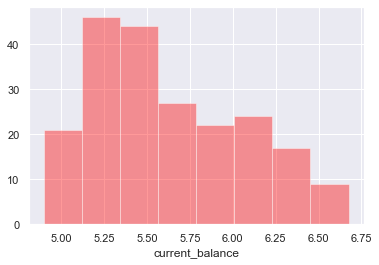

BoxPlot of current_balance
----------------------------------------------------------------------------


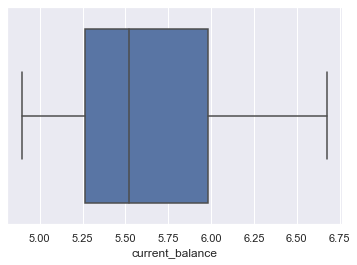

In [12]:
univariateAnalysis_numeric('current_balance',2)

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


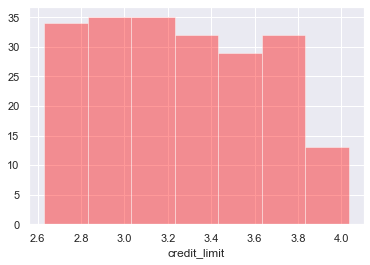

BoxPlot of credit_limit
----------------------------------------------------------------------------


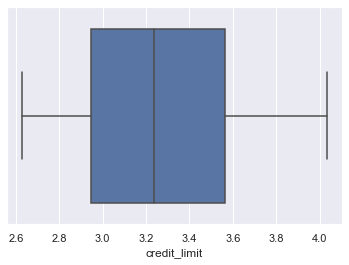

In [13]:
univariateAnalysis_numeric('credit_limit',2)

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


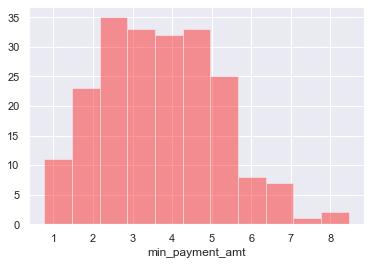

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


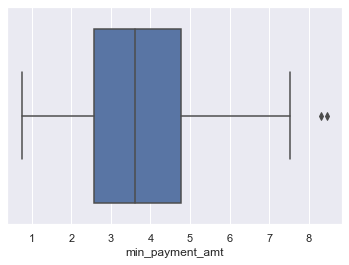

In [14]:
univariateAnalysis_numeric('min_payment_amt',2)

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


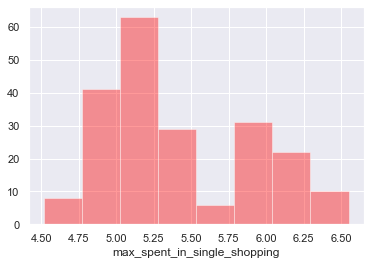

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


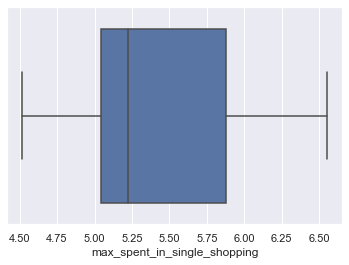

In [15]:
univariateAnalysis_numeric('max_spent_in_single_shopping',2)

In [16]:
bank.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

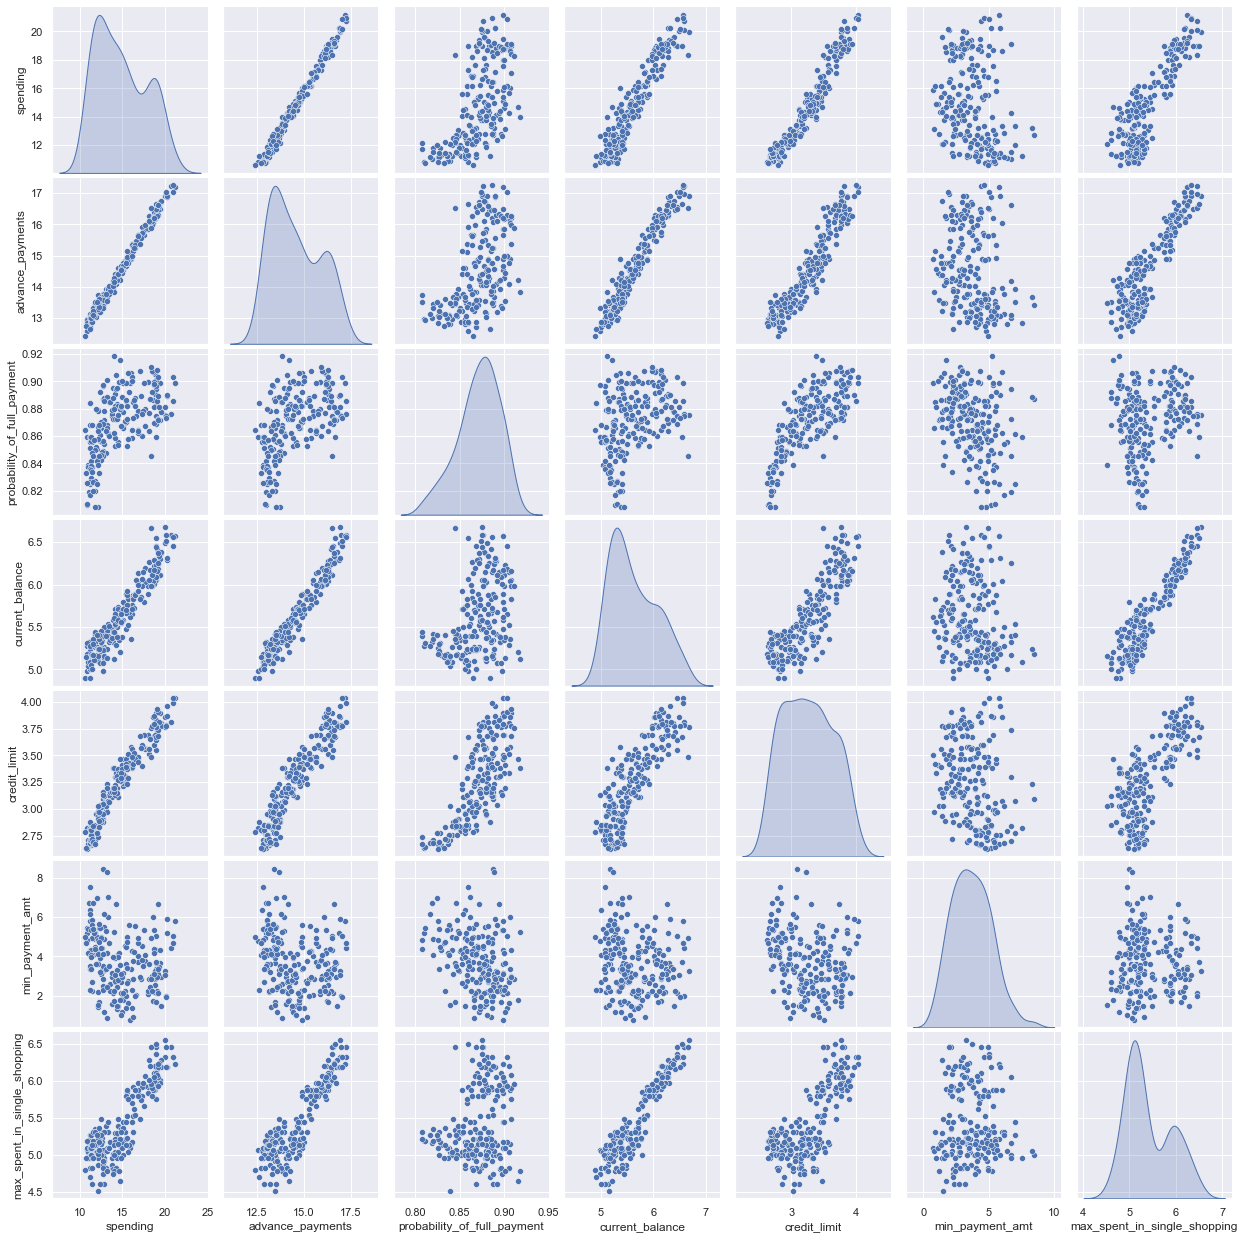

In [17]:
sns.pairplot(bank,diag_kind='kde');

In [18]:
corr = bank.corr().T

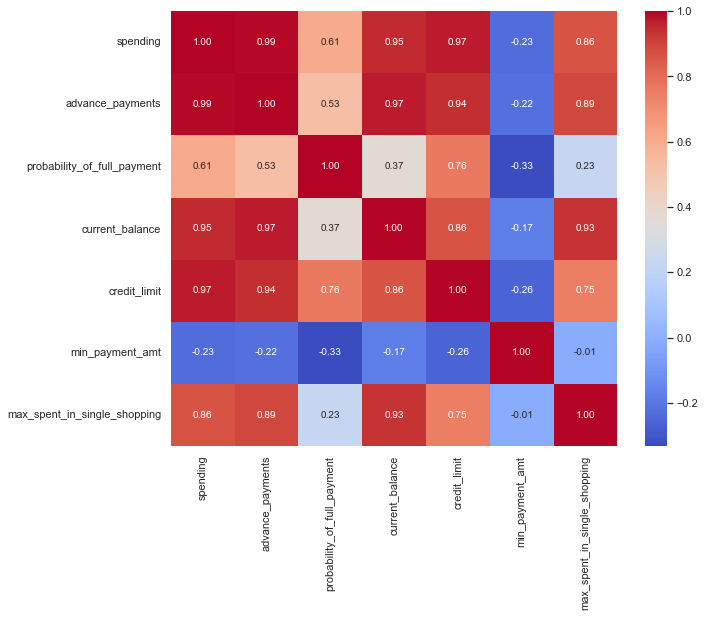

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

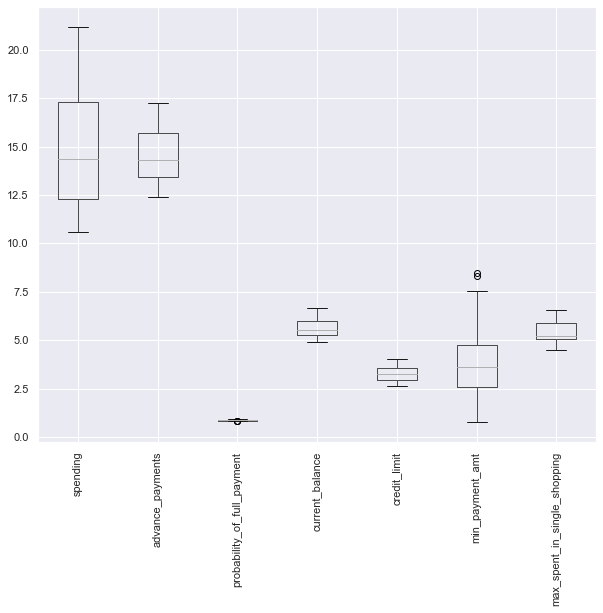

In [20]:
bank.boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

In [21]:
no_outlier = ['spending','advance_payments','current_balance','credit_limit','max_spent_in_single_shopping']

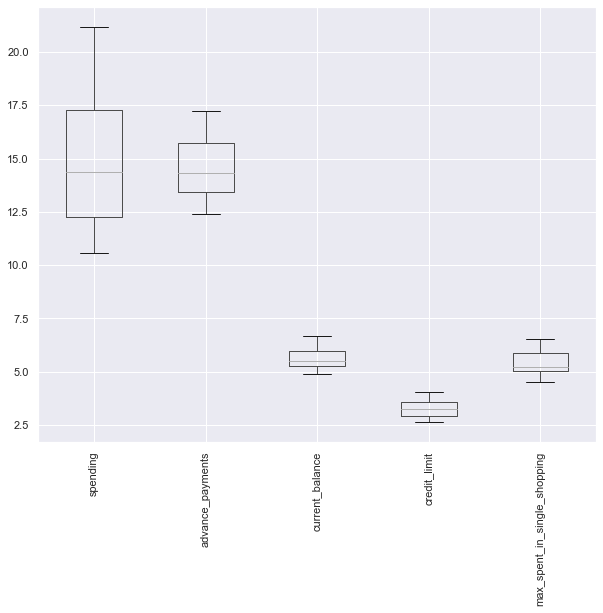

In [22]:
bank[no_outlier].boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

In [23]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [24]:
outlier_list = [x for x in bank.columns if x not in no_outlier]

In [25]:
for i in bank[outlier_list]:    
    bank[i]=treat_outlier(bank[i])

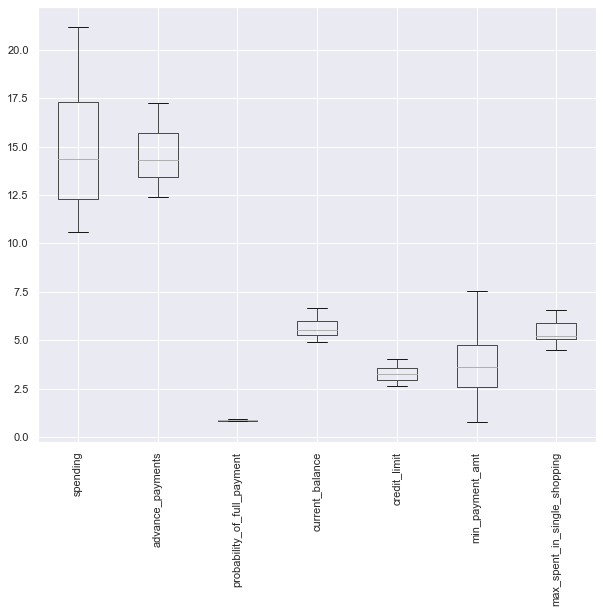

In [26]:
bank.boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [27]:
bank_scaled = bank.apply(zscore)
bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.171955,2.367533,1.338579,-0.294861,2.328998
1,0.393582,0.253840,1.528129,-0.600744,0.858236,-0.236880,-0.538582
2,1.413300,1.428192,0.506652,1.401485,1.317348,-0.214791,1.509107
3,-1.384034,-1.227533,-1.970322,-0.793049,-1.639017,1.037338,-0.454961
4,1.082581,0.998364,1.215165,0.591544,1.155464,-1.112128,0.874813


In [28]:
bank_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


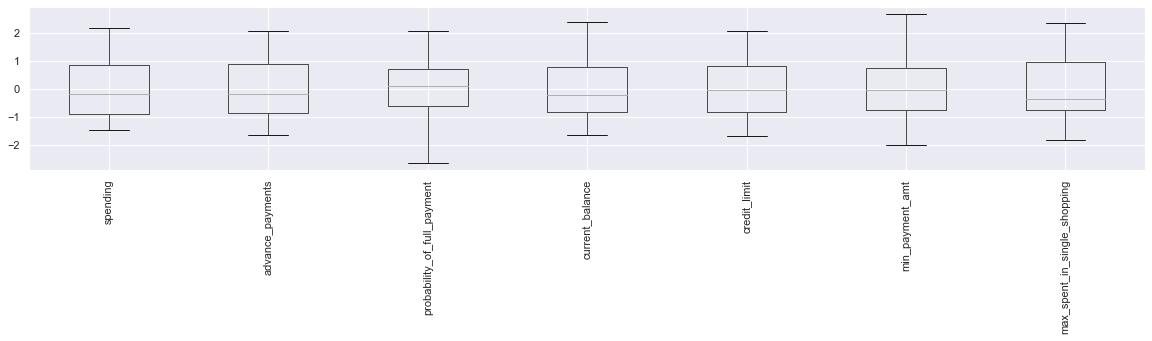

In [29]:
bank_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [30]:
wardlink = linkage(bank_scaled, method = 'ward')

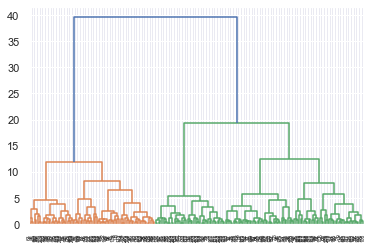

In [31]:
dend_ward = dendrogram(wardlink)

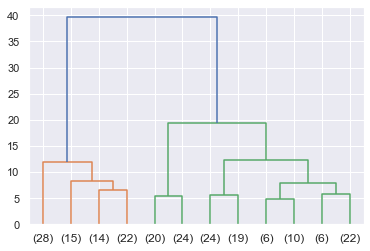

In [32]:
dend_ward = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 12,
                 )

In [33]:
average = linkage(bank_scaled, method = 'average')

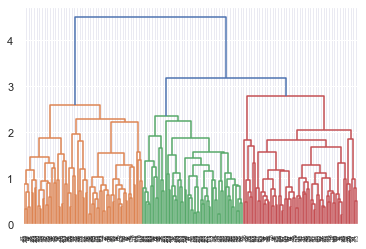

In [34]:
dend_average = dendrogram(average)

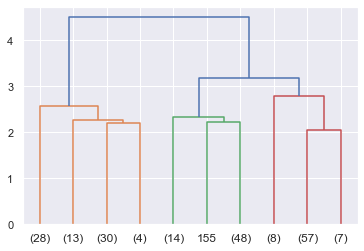

In [35]:
dend_average = dendrogram(average,
                 truncate_mode='lastp',
                 p = 10,
                 )

#### We will choose average method for further analysis

In [36]:
clusters = fcluster(average, 3, criterion='maxclust')
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 1, 2, 1,
       1, 2, 1, 2, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 1, 1, 1,
       1, 3, 3, 1, 2, 3, 2, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       1, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 1,
       2, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 2, 2, 1, 1, 2, 1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 1], dtype=int32)

In [37]:
cluster_bank = bank.copy()

In [38]:
cluster_bank['clusters'] = clusters

In [39]:
cluster_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.825915,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [40]:
cluster_bank['clusters'].value_counts().sort_index()

1    75
2    63
3    72
Name: clusters, dtype: int64

In [41]:
final_bank = cluster_bank.groupby('clusters').mean()
final_bank['Freq'] = cluster_bank['clusters'].value_counts().sort_index()
final_bank

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,14.167302,14.186190,0.882776,5.451381,3.236794,2.377956,5.048698,63
3,12.024306,13.324583,0.850371,5.255194,2.871944,4.847925,5.119431,72


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [42]:
X = StandardScaler()

In [43]:
bank_KMeans = X.fit_transform(bank_scaled)

In [44]:
bank_KMeans

array([[ 1.75435461,  1.81196782,  0.17195484, ...,  1.33857863,
        -0.29486146,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.5281286 , ...,  0.85823561,
        -0.23687972, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50665157, ...,  1.317348  ,
        -0.21479144,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36321012, ..., -0.15287318,
        -1.35440871, -0.83023461],
       [ 0.43836719,  0.33827054,  1.24993911, ...,  0.60081421,
        -0.97269559,  0.07123789],
       [ 0.24889256,  0.45340314, -0.80605508, ..., -0.07325831,
        -0.71729984,  0.96047321]])

In [45]:
k_means = KMeans(n_clusters = 1)
k_means.fit(bank_KMeans)
k_means.inertia_

1469.9999999999998

In [46]:
k_means = KMeans(n_clusters = 2)
k_means.fit(bank_KMeans)
k_means.inertia_

659.1308122335327

In [47]:
k_means = KMeans(n_clusters = 3)
k_means.fit(bank_KMeans)
k_means.inertia_

429.4139632109118

In [48]:
k_means = KMeans(n_clusters = 3)

In [49]:
k_means.fit(bank_KMeans)

KMeans(n_clusters=3)

In [50]:
k_means.labels_

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1])

In [51]:
wss =[]

In [52]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(bank_KMeans)
    wss.append(KM.inertia_)

In [53]:
wss

[1469.9999999999998,
 659.1308122335327,
 429.4139632109118,
 369.4399699481353,
 322.19700309596533,
 291.20292088894905,
 262.78604010801934,
 242.2347930397028,
 222.66735387003797,
 204.48851995651546]

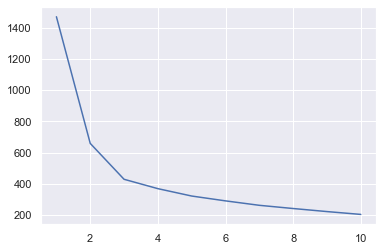

In [54]:
plt.plot(range(1,11), wss)

In [55]:
k_means = KMeans(n_clusters = 3)
k_means.fit(bank_KMeans)
labels = k_means.labels_

In [56]:
bank_scaled["Clus_kmeans"] = labels
bank_scaled.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,1.754355,1.811968,0.171955,2.367533,1.338579,-0.294861,2.328998,1
1,0.393582,0.253840,1.528129,-0.600744,0.858236,-0.236880,-0.538582,2
2,1.413300,1.428192,0.506652,1.401485,1.317348,-0.214791,1.509107,1
3,-1.384034,-1.227533,-1.970322,-0.793049,-1.639017,1.037338,-0.454961,0
4,1.082581,0.998364,1.215165,0.591544,1.155464,-1.112128,0.874813,1


In [57]:
silhouette_score(bank_scaled,labels)

0.4797670906510904

In [58]:
sil_width = silhouette_samples(bank_scaled,labels)

In [59]:
bank_scaled["sil_width"] = sil_width
bank_scaled.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,1.754355,1.811968,0.171955,2.367533,1.338579,-0.294861,2.328998,1,0.577861
1,0.393582,0.253840,1.528129,-0.600744,0.858236,-0.236880,-0.538582,2,0.388193
2,1.413300,1.428192,0.506652,1.401485,1.317348,-0.214791,1.509107,1,0.642612
3,-1.384034,-1.227533,-1.970322,-0.793049,-1.639017,1.037338,-0.454961,0,0.621108
4,1.082581,0.998364,1.215165,0.591544,1.155464,-1.112128,0.874813,1,0.390249


In [60]:
silhouette_samples(bank_scaled,labels).min()

0.04543257446422343

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [61]:
final_bank.T

clusters,1,2,3
spending,18.129200,14.167302,12.024306
advance_payments,16.058000,14.186190,13.324583
probability_of_full_payment,0.881595,0.882776,0.850371
current_balance,6.135747,5.451381,5.255194
credit_limit,3.648120,3.236794,2.871944
min_payment_amt,3.650200,2.377956,4.847925
max_spent_in_single_shopping,5.987040,5.048698,5.119431
Freq,75.000000,63.000000,72.000000


# Problem 2

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## Attribute Information:

#### 1. Target: Claim Status (Claimed)
#### 2. Code of tour firm (Agency_Code)
#### 3. Type of tour insurance firms (Type)
#### 4. Distribution channel of tour insurance agencies (Channel)
#### 5. Name of the tour insurance products (Product)
#### 6. Duration of the tour (Duration in days)
#### 7. Destination of the tour (Destination)
#### 8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
#### 9. The commission received for tour insurance firm (Commission is in percentage of sales)
#### 10.Age of insured (Age)

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [62]:
df = pd.read_csv("insurance_part2_data.csv")

In [63]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [65]:
df.shape

(3000, 10)

In [66]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [67]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
print('Agency_Code \n',df.Agency_Code.value_counts())
print('\n')
print('Type \n',df.Type.value_counts())
print('\n')
print('Claimed \n',df.Claimed.value_counts())
print('\n')
print('Channel \n',df.Channel.value_counts())
print('\n')
print('Product Name \n',df['Product Name'].value_counts())
print('\n')
print('Destination \n',df.Destination.value_counts())

Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Product Name 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


Destination 
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


In [69]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [70]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='red');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


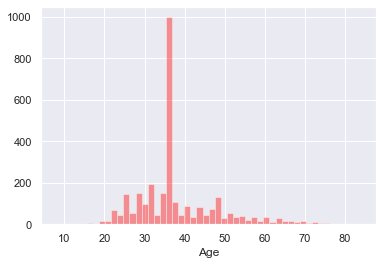

BoxPlot of Age
----------------------------------------------------------------------------


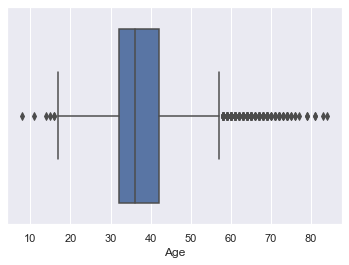

In [71]:
univariateAnalysis_numeric('Age',2)

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


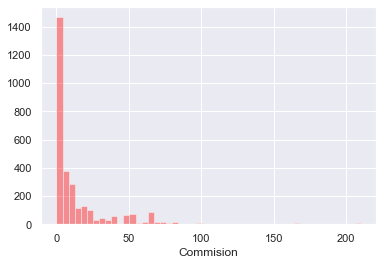

BoxPlot of Commision
----------------------------------------------------------------------------


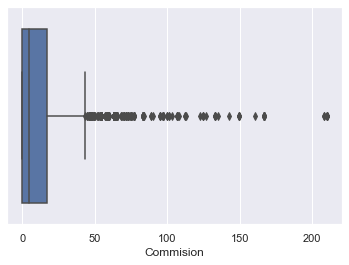

In [72]:
univariateAnalysis_numeric('Commision',2)

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


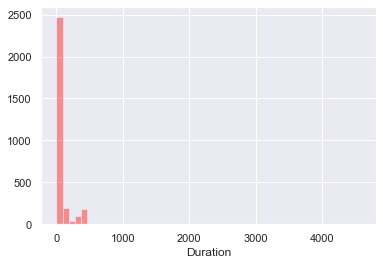

BoxPlot of Duration
----------------------------------------------------------------------------


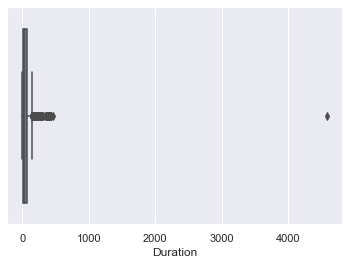

In [73]:
univariateAnalysis_numeric('Duration',2)

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


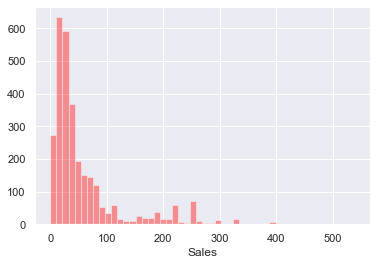

BoxPlot of Sales
----------------------------------------------------------------------------


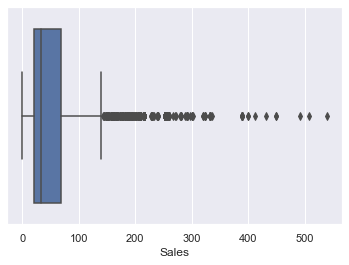

In [74]:
univariateAnalysis_numeric('Sales',2)

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

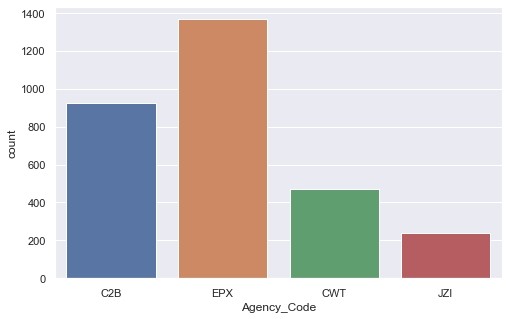

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(df['Agency_Code'])

<AxesSubplot:xlabel='Type', ylabel='count'>

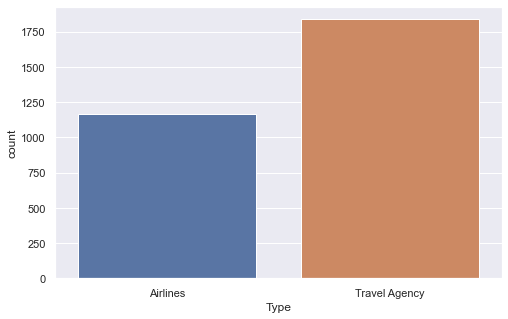

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(df['Type'])

<AxesSubplot:xlabel='Claimed', ylabel='count'>

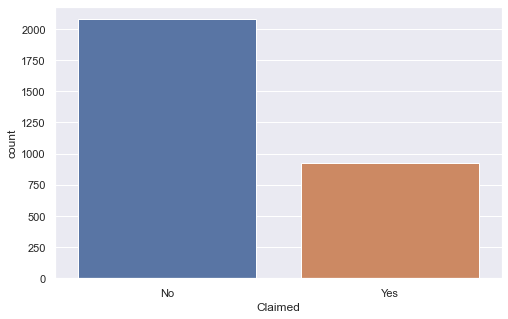

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(df['Claimed'])

<AxesSubplot:xlabel='Channel', ylabel='count'>

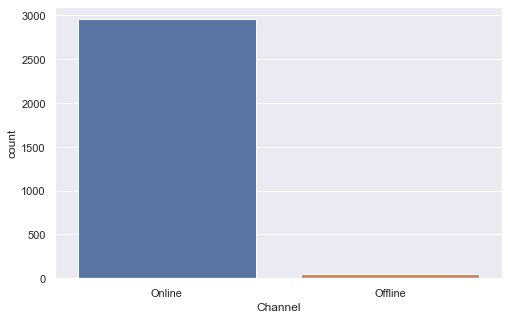

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(df['Channel'])

<AxesSubplot:xlabel='Product Name', ylabel='count'>

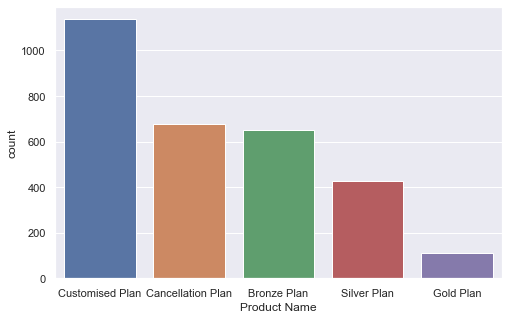

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(df['Product Name'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

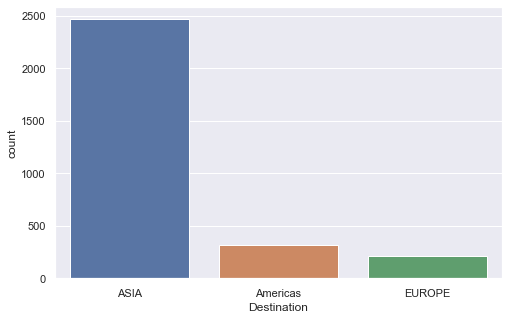

In [80]:
plt.figure(figsize=(8,5))
sns.countplot(df['Destination'])

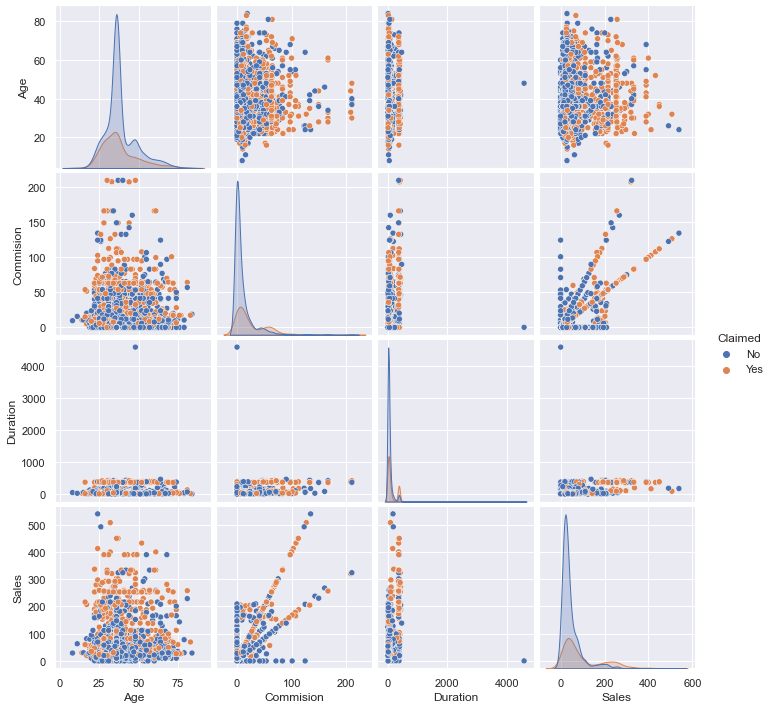

In [81]:
sns.pairplot(df,diag_kind='kde', hue= "Claimed");

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

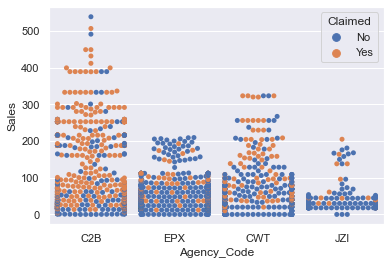

In [82]:
sns.swarmplot(data = df, x = 'Agency_Code', y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

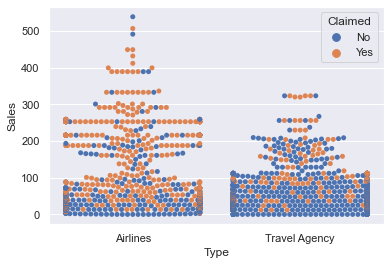

In [83]:
sns.swarmplot(data = df, x = 'Type', y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

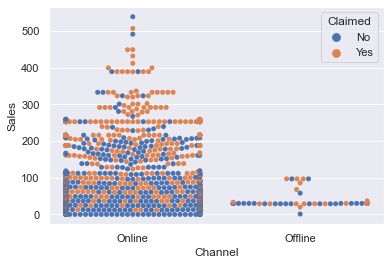

In [84]:
sns.swarmplot(data = df, x = 'Channel', y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

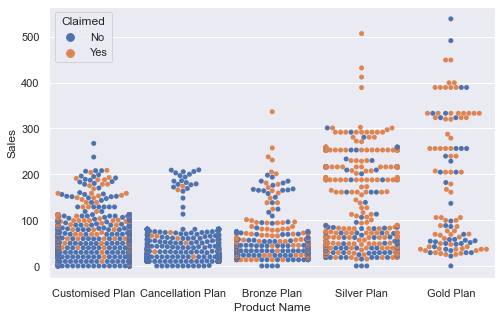

In [85]:
plt.figure(figsize=(8,5))
sns.swarmplot(data = df, x = 'Product Name', y = 'Sales', hue = 'Claimed')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

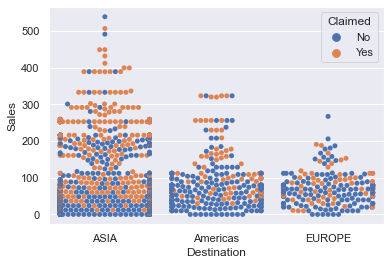

In [86]:
sns.swarmplot(data = df, x = 'Destination', y = 'Sales', hue = 'Claimed')

In [87]:
corr1 = df.corr().T

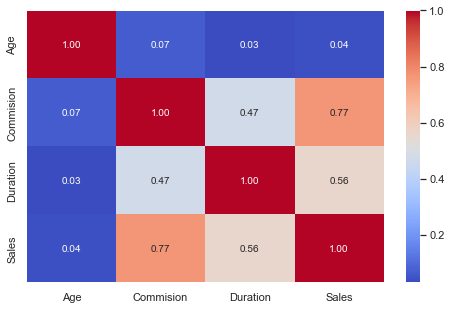

In [88]:
plt.figure(figsize=(8,5))
sns.heatmap(corr1,annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [89]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [90]:
print('Agency_Code \n',df.Agency_Code.value_counts())
print('\n')
print('Type \n',df.Type.value_counts())
print('\n')
print('Claimed \n',df.Claimed.value_counts())
print('\n')
print('Channel \n',df.Channel.value_counts())
print('\n')
print('Product Name \n',df['Product Name'].value_counts())
print('\n')
print('Destination \n',df.Destination.value_counts())

Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Product Name 
 2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [92]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [93]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

### Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [94]:
X = df.drop("Claimed", axis=1)
y = df.pop("Claimed")

In [95]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [96]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


### Decision Tree

In [97]:
grid_dt_model = {
    'max_depth': [10,20,30,40, 50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

grid_search_dt_model = GridSearchCV(estimator = dt_model, param_grid = grid_dt_model, cv = 3)

In [98]:
grid_search_dt_model.fit(X_train, train_labels)
print(grid_search_dt_model.best_params_)
best_grid_dt_model = grid_search_dt_model.best_estimator_
best_grid_dt_model

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [99]:
from sklearn import tree

train_char_label = ['No', 'Yes']
df_Tree_File = open('d:\df_tree.dot','w')
dot_data = tree.export_graphviz(best_grid_dt_model, out_file=df_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

df_Tree_File.close()

In [100]:
print (pd.DataFrame(best_grid_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.030261
Agency_Code   0.599363
Type          0.007416
Commision     0.012676
Channel       0.000000
Duration      0.037945
Sales         0.255785
Product Name  0.056555
Destination   0.000000


In [101]:
y_predict = best_grid_dt_model.predict(X_test)

In [102]:
ytrain_predict = best_grid_dt_model.predict(X_train)
ytest_predict = best_grid_dt_model.predict(X_test)

AUC: 0.836


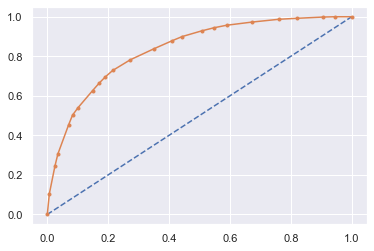

In [103]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.794


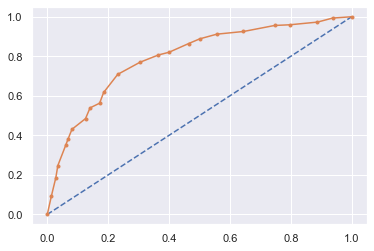

In [104]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [105]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [106]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [107]:
confusion_matrix(train_labels, ytrain_predict)

array([[1349,  122],
       [ 313,  316]], dtype=int64)

In [108]:
confusion_matrix(test_labels, ytest_predict)

array([[564,  41],
       [183, 112]], dtype=int64)

In [109]:
best_grid_dt_model.score(X_train,train_labels)

0.7928571428571428

In [110]:
best_grid_dt_model.score(X_test,test_labels)

0.7511111111111111

### Random Forest

In [111]:
rfcl = RandomForestClassifier(n_estimators = 500)
rfcl = rfcl.fit(X_train, train_labels)

In [112]:
param_grid = {
    'max_depth': [4, 5, 6],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [6, 8],
    'min_samples_split': [45, 50],
    'n_estimators': [300, 450]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 6)

In [113]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [45, 50],
                         'n_estimators': [300, 450]})

In [114]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 45,
 'n_estimators': 450}

In [115]:
best_grid = grid_search.best_estimator_

In [116]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [117]:
confusion_matrix(train_labels,ytrain_predict)

array([[1312,  159],
       [ 249,  380]], dtype=int64)

In [118]:
confusion_matrix(test_labels,ytest_predict)

array([[554,  51],
       [149, 146]], dtype=int64)

In [119]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1471
           1       0.71      0.60      0.65       629

    accuracy                           0.81      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [120]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       605
           1       0.74      0.49      0.59       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.76       900



AUC: 0.852


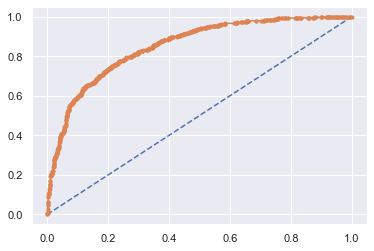

In [121]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.820


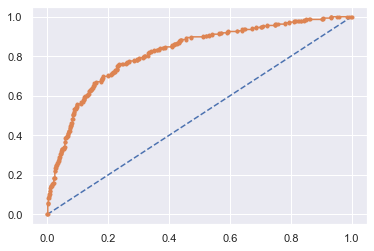

In [122]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Artificial Neural Network (ANN)

In [123]:
sc = StandardScaler()

In [124]:
X_train = sc.fit_transform(X_train)

In [125]:
X_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [126]:
X_test = sc.transform(X_test)

In [127]:
X_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

In [128]:
param_grid_ann = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [1000, 2000, 3000],
    'solver': ['sgd','adam'],
    'tol': [0.01, 0.01],
}
clf = MLPClassifier(random_state=1)
grid_search_ann = GridSearchCV(estimator = clf, param_grid = param_grid_ann, cv = 3)

In [129]:
grid_search_ann.fit(X_train, train_labels)
grid_search_ann.best_params_
best_grid_ann = grid_search_ann.best_estimator_
best_grid_ann

MLPClassifier(hidden_layer_sizes=200, max_iter=1000, random_state=1, tol=0.01)

In [130]:
ytrain_predict_ann = best_grid_ann.predict(X_train)
ytest_predict_ann = best_grid_ann.predict(X_test)

In [131]:
cm = confusion_matrix(test_labels, ytest_predict_ann)
cm

array([[556,  49],
       [167, 128]], dtype=int64)

In [132]:
pred2 = best_grid_ann.predict(X_train)
confusion_matrix(train_labels,pred2)

array([[1311,  160],
       [ 311,  318]], dtype=int64)

In [133]:
print(classification_report(test_labels, ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [134]:
print(classification_report(train_labels, pred2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1471
           1       0.67      0.51      0.57       629

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



AUC: 0.818


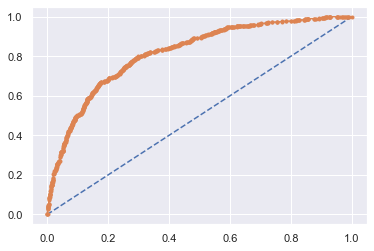

In [135]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.804


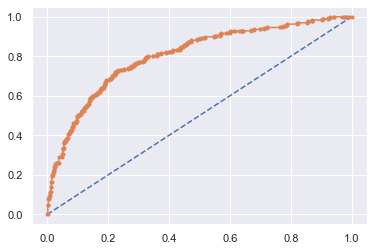

In [136]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid_ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()